In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from matplotlib import dates

In [3]:
store = pd.read_csv("stores.csv")
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


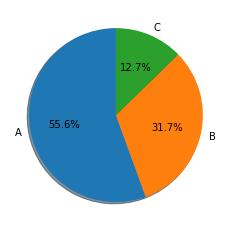

In [4]:
gk = store.groupby('Type').mean()
mylabels = ["A", "B", "C"]
plt.pie(gk['Size'], labels = mylabels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show() 

In [5]:
data = pd.read_csv('Walmart_Store_sales.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
data['Date'] =  pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


/home/xelpmoc/Desktop/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/xelpmoc/Desktop/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/xelpmoc/Desktop/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/xelpmoc/Desktop/notebook/jupyterenv/lib/python3.8/site-packages/pandas/co

In [7]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


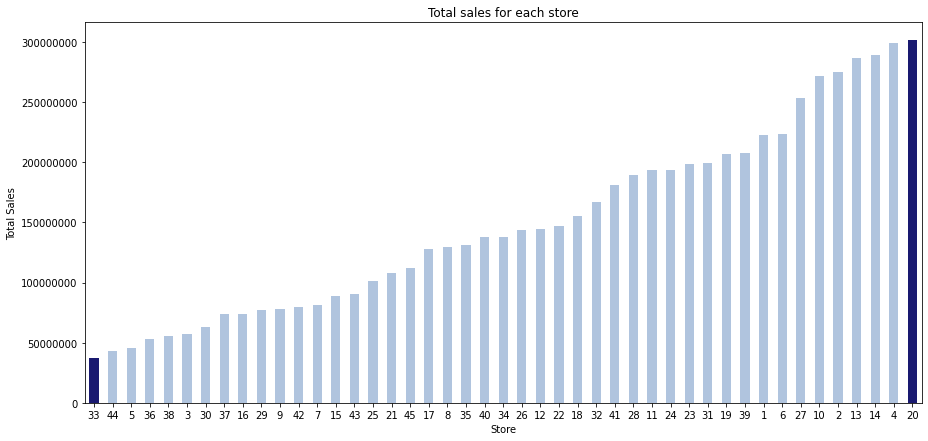

In [9]:

plt.figure(figsize=(15,7))

total_sales_for_each_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store)

clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]

ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

In [32]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
stores_df = pd.read_csv('stores.csv')
test_df = pd.read_csv('test.csv')
dataset = features_df.merge(stores_df, how='inner', on='Store')

from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
train_df.info()

dataset['Week'] = dataset.Date.dt.week # for the week data
dataset['Year'] = dataset.Date.dt.year # for the year data

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


/tmp/ipykernel_4132/1525326225.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['Week'] = dataset.Date.dt.week # for the week data


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,9,2010


In [35]:
train_merge = train_df.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [36]:
test_merge = test_df.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

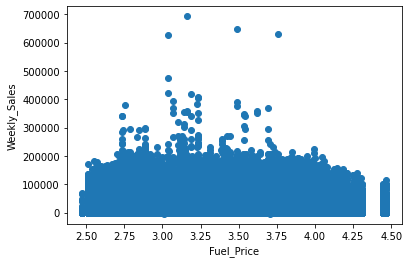

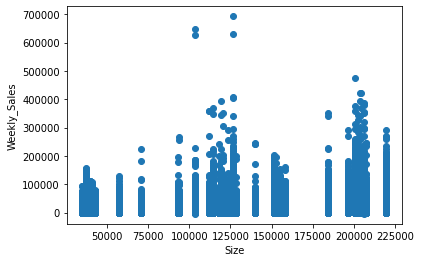

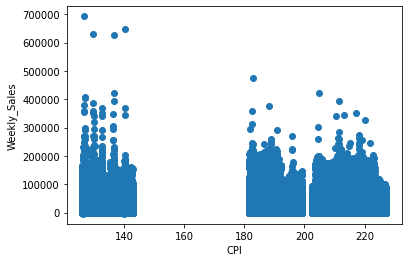

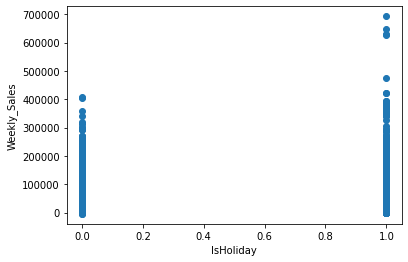

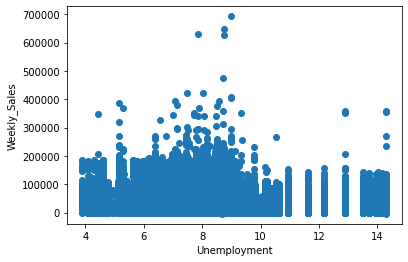

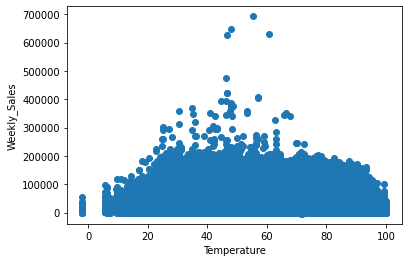

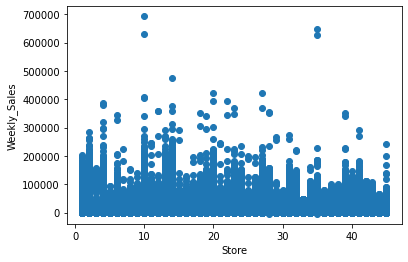

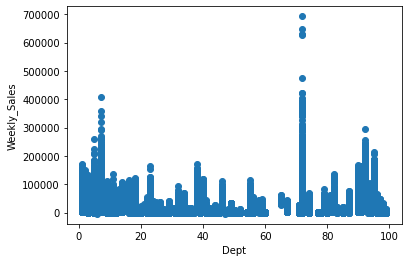

In [38]:
def scatter(train_merge, column):
    plt.figure()
    plt.scatter(train_merge[column] , train_merge['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

#scatter plot for various relationships.
scatter(train_merge, 'Fuel_Price')  #with respect to Fuel_Price
scatter(train_merge, 'Size')  #with respect to Size
scatter(train_merge, 'CPI')  #with respect to CPI
scatter(train_merge, 'IsHoliday') #with respect to IsHoliday
scatter(train_merge, 'Unemployment')  #with respect to Unemployment
scatter(train_merge, 'Temperature') #with respect to Temperature
scatter(train_merge, 'Store') #with respect to Store
scatter(train_merge, 'Dept')  #with respect to Dept

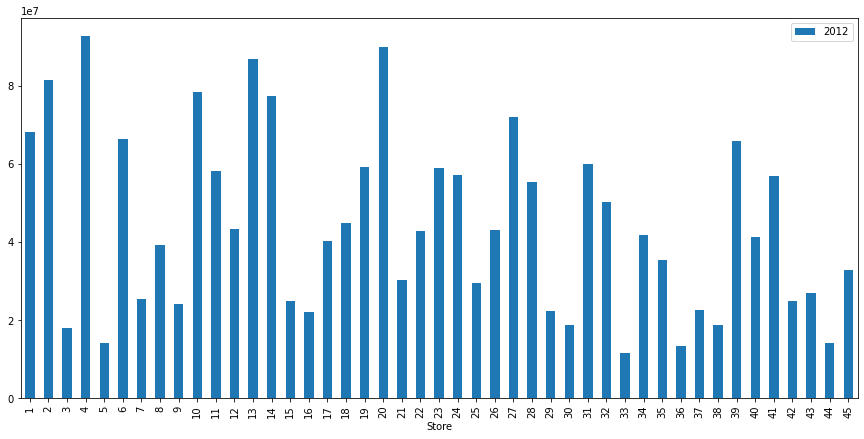

In [11]:
#data = pd.read_csv('train.csv')
plt.figure(figsize=(15,7))

# Sales for third quarterly in 2012
Q3 = data[(data['Date'] > '2012-01-01') & (data['Date'] < '2012-12-31')].groupby('Store')['Weekly_Sales'].sum()


# Plotting the sales for 2012
plt.plot(ax=Q3.plot(kind='bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["2012"]);

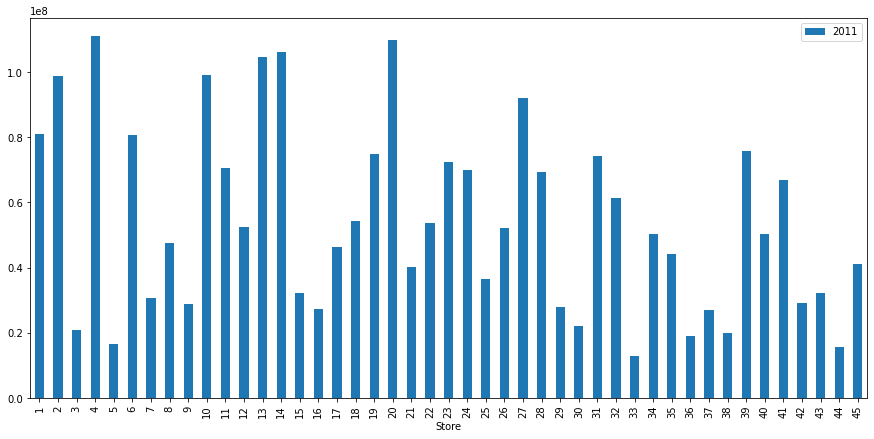

In [12]:
#data = pd.read_csv('train.csv')
plt.figure(figsize=(15,7))

# Sales for third quarterly in 2011
Q3 = data[(data['Date'] > '2011-01-01') & (data['Date'] < '2011-12-31')].groupby('Store')['Weekly_Sales'].sum()


# Plotting the sales for 2011
plt.plot(ax=Q3.plot(kind='bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["2011"]);

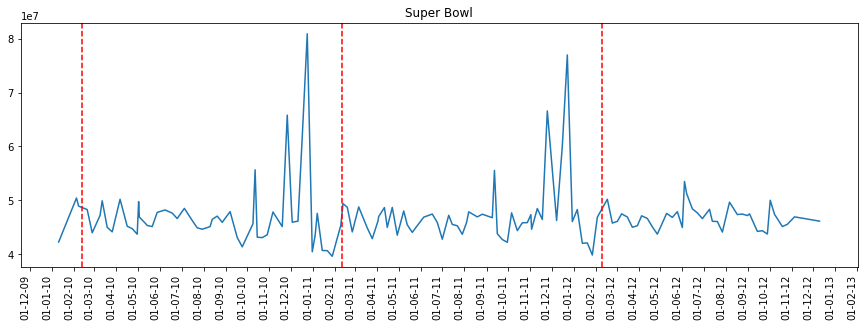

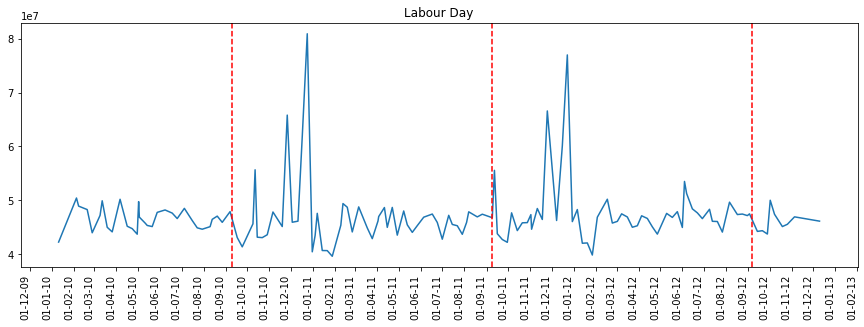

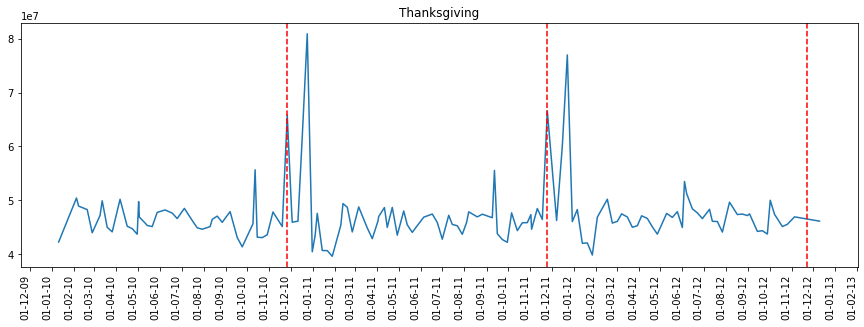

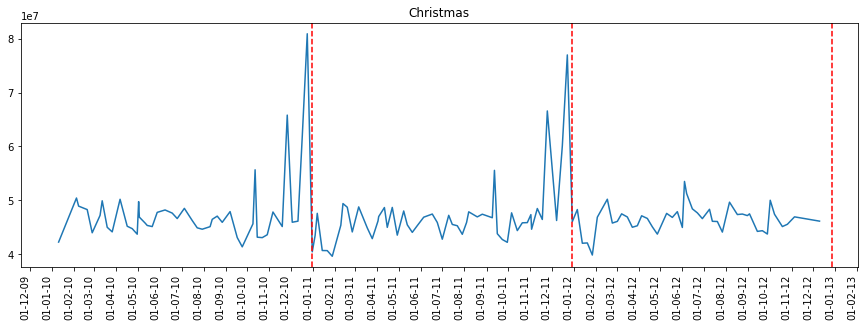

In [57]:

def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

/home/xelpmoc/Desktop/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:339: UserWarning: Parsing '26-11-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return cls._from_sequence_not_strict(scalars, dtype=dtype, copy=copy)
/home/xelpmoc/Desktop/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:339: UserWarning: Parsing '25-11-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return cls._from_sequence_not_strict(scalars, dtype=dtype, copy=copy)
/home/xelpmoc/Desktop/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:339: UserWarning: Parsing '23-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return cls._from_sequence_not_strict(scalars, dtype=dtype, copy=copy)
/home/xelpmoc/Desktop/notebook/jupyterenv/lib/python3.8/site-pac

<AxesSubplot:title={'center':'Yearly Sales in Christmas holiday'}, xlabel='Year'>

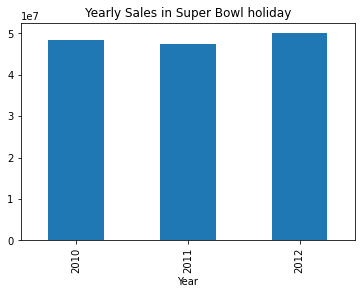

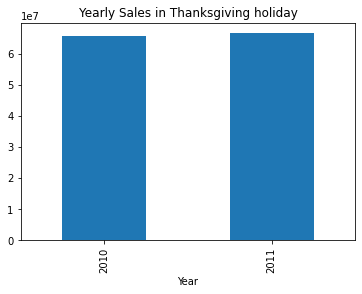

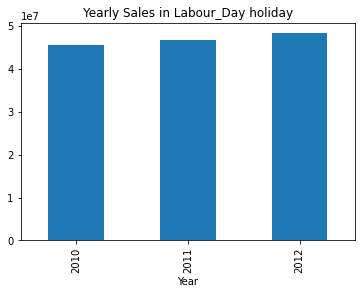

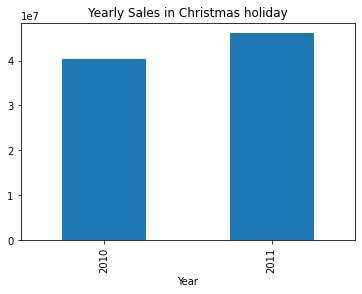

In [58]:
# Yearly Sales in holidays
Super_Bowl_df = pd.DataFrame(data.loc[data.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(data.loc[data.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(data.loc[data.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(data.loc[data.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales in Super Bowl holiday') 
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales in Thanksgiving holiday') 
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales in Labour_Day holiday')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales in Christmas holiday')

In [48]:
data.loc[data.Date.isin(Super_Bowl)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year


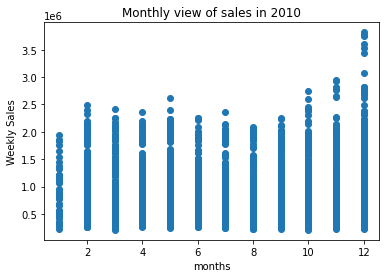

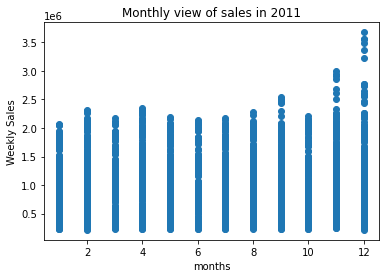

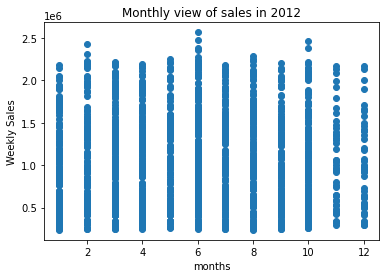

In [59]:

# Monthly view of sales for each years
plt.scatter(data[data.Year==2010]["Month"],data[data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.scatter(data[data.Year==2011]["Month"],data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(data[data.Year==2012]["Month"],data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

Text(0.5, 1.0, 'Monthly view of sales')

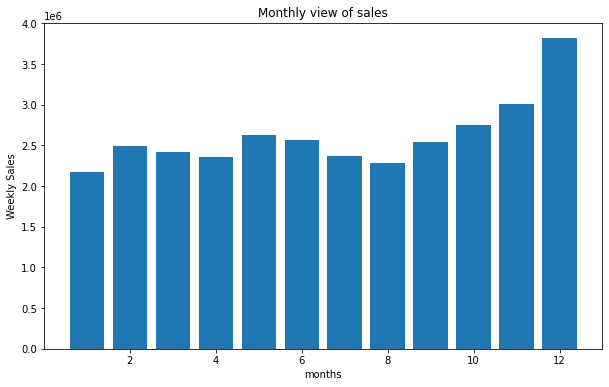

In [60]:
# Monthly view of sales for all years
plt.figure(figsize=(10,6))
plt.bar(data["Month"],data["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

<Figure size 720x432 with 0 Axes>

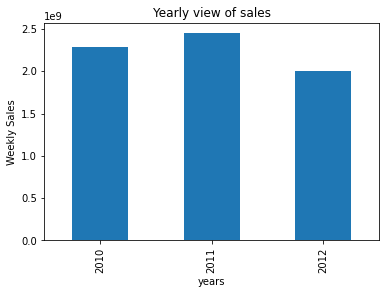

In [61]:
# Yearly view of sales
plt.figure(figsize=(10,6))
data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");